# Hellman Analysis

First, let's see how many files we are working with. 

In [63]:
library(tidyverse)
library(gridExtra)

sot_filenames <- list.files("/mnt/chrastil/lab/data/Hellman/GoogleDrive/SOT/")[!grepl("QC", list.files("/mnt/chrastil/lab/data/Hellman/GoogleDrive/SOT/")) & grepl(".csv", list.files("/mnt/chrastil/lab/data/Hellman/GoogleDrive/SOT/"))]
oft_filenames <- list.files("/mnt/chrastil/lab/data/Hellman/GoogleDrive/OFT/")[grepl("_objdistance.csv", list.files("/mnt/chrastil/lab/data/Hellman/GoogleDrive/OFT/"))]
print(paste("# of SOT files:", length(sot_filenames)))
print(paste("# of OFT files:", length(oft_filenames)))

[1] "# of SOT files: 253"
[1] "# of OFT files: 219"


## OFT Summary
#### Lets look at the spread of Test Trial Performance within OFT. First we'll look at participant averages, then by trial, and then by object type.

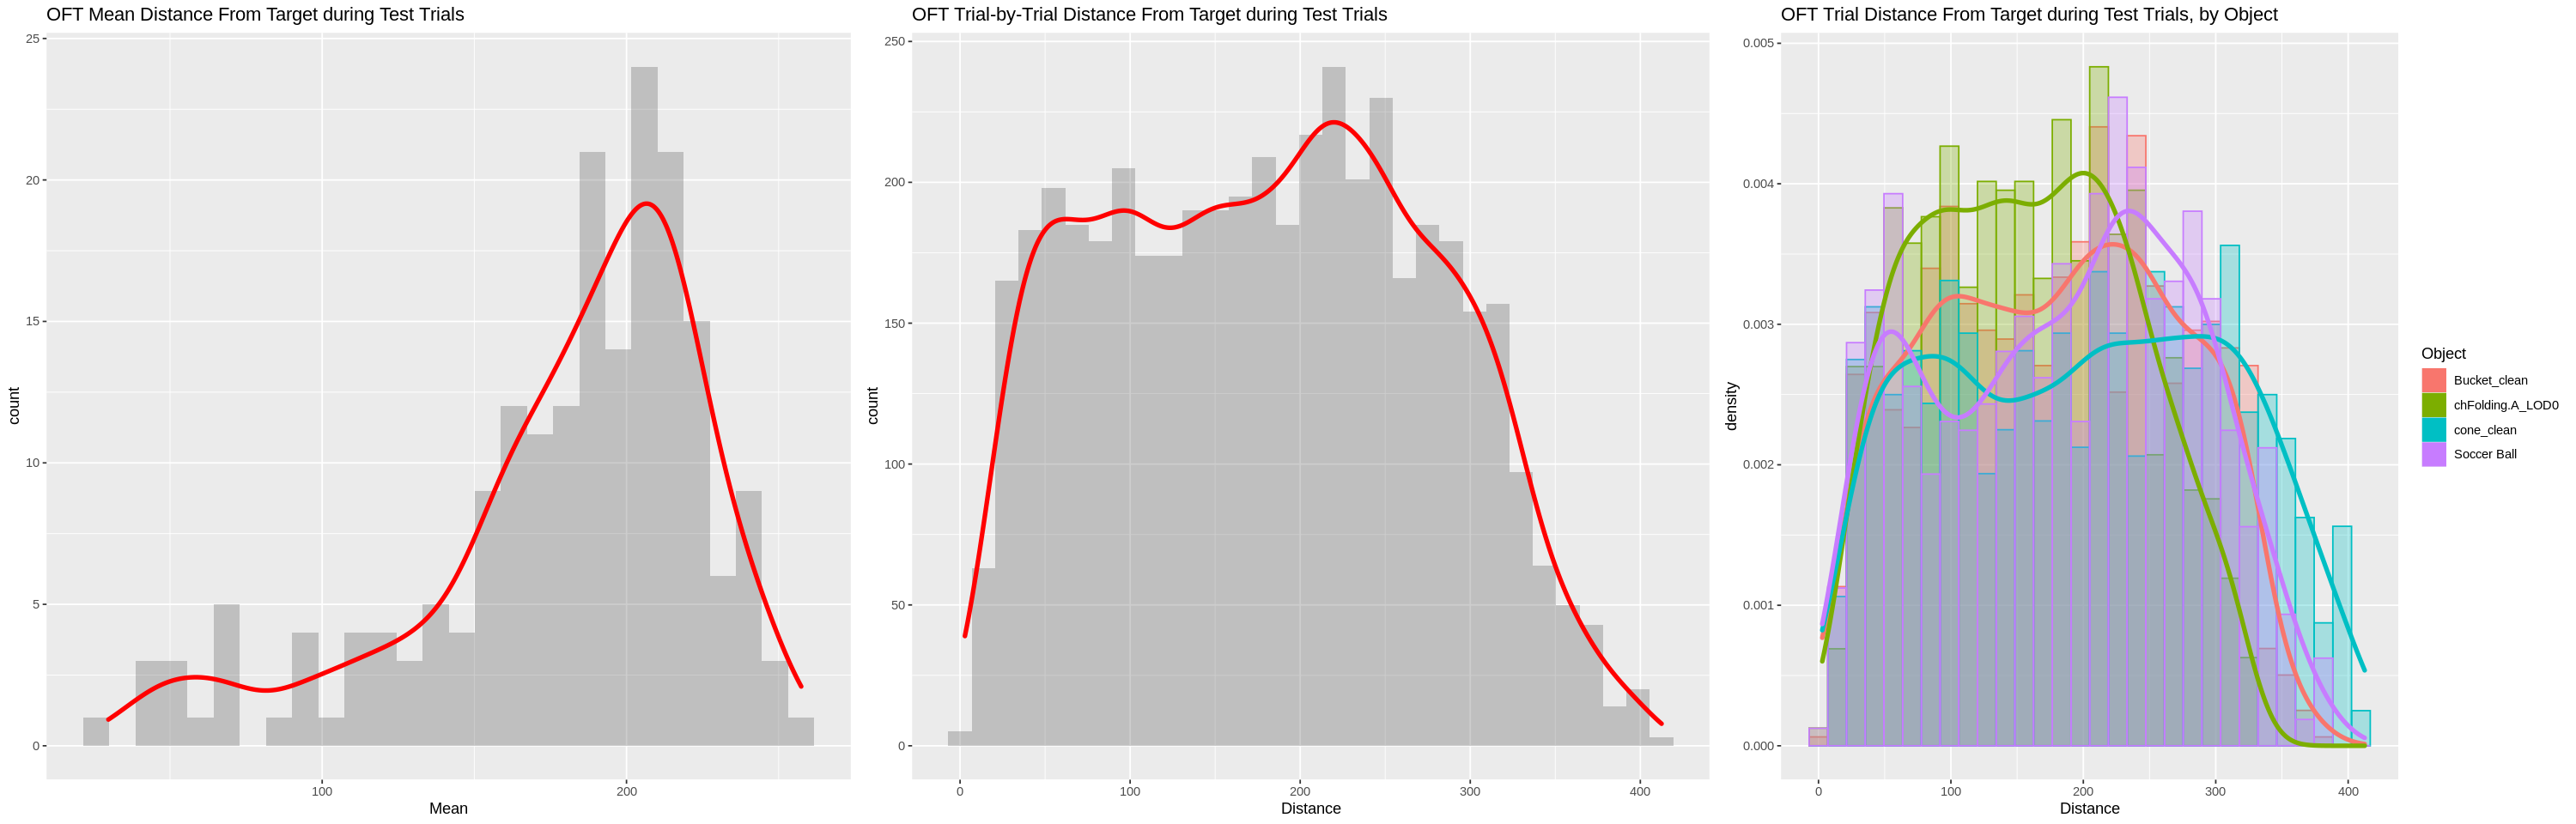

In [126]:
oft_mean_performances <- c()
oft_trial_performances <- c()
oft_object_types <- c()
oft_sd_performances <- c()

options(warn=-1)

for (i in 1:length(oft_filenames)){
    file <- read.csv(paste0("/mnt/chrastil/lab/data/Hellman/GoogleDrive/OFT/", oft_filenames[i]), header = FALSE)
    file <- file[grepl("Test", file$V2), ]
    oft_mean_performances <- c(oft_mean_performances,  mean(file$V10))
    oft_sd_performances <- c(oft_sd_performances, sd(file$V10))
    oft_trial_performances <- c(oft_trial_performances, file$V10)
    oft_object_types <- c(oft_object_types, as.character(file$V1))
}


summary_OFT <- data.frame(Mean = oft_mean_performances, SD = oft_sd_performances)
summary_OFT_trial <- data.frame(Distance = oft_trial_performances, Object = oft_object_types)

oftmean <- ggplot(summary_OFT, aes(x = Mean)) +
  geom_histogram(alpha = 0.3, binwidth = max(summary_OFT$Mean, na.rm = TRUE) / 30) +
  geom_density(aes(y = ..count.. * (max(summary_OFT$Mean, na.rm = TRUE) / 30)), size = 1.5, color = "red") +
  ggtitle("OFT Mean Distance From Target during Test Trials")

ofttbt <- ggplot(summary_OFT_trial, aes(x = Distance)) +
  geom_histogram(alpha = 0.3, binwidth = max(summary_OFT_trial$Distance, na.rm = TRUE) / 30) +
  geom_density(aes(y = ..count.. * (max(summary_OFT_trial$Distance, na.rm = TRUE) / 30)), size = 1.5, color = "red") +
  ggtitle("OFT Trial-by-Trial Distance From Target during Test Trials")

ofttbtobject <- ggplot(summary_OFT_trial, aes(x = Distance, y = ..density..)) +
  geom_histogram(aes(color = Object, fill = Object), alpha = 0.3, bins = 30, position = 'identity') +
  geom_density(size = 1.5, aes(color = Object)) +
  ggtitle("OFT Trial Distance From Target during Test Trials, by Object")

options(repr.plot.width=25, repr.plot.height=8)

grid.arrange(oftmean, ofttbt, ofttbtobject, ncol = 3)
options(warn=1)

## SOT Summary
#### Next lets look at the spread of Test Trial Performance within SOT. First we'll look at participant averages and  by trial, for both Angular Error and Reaction Times.

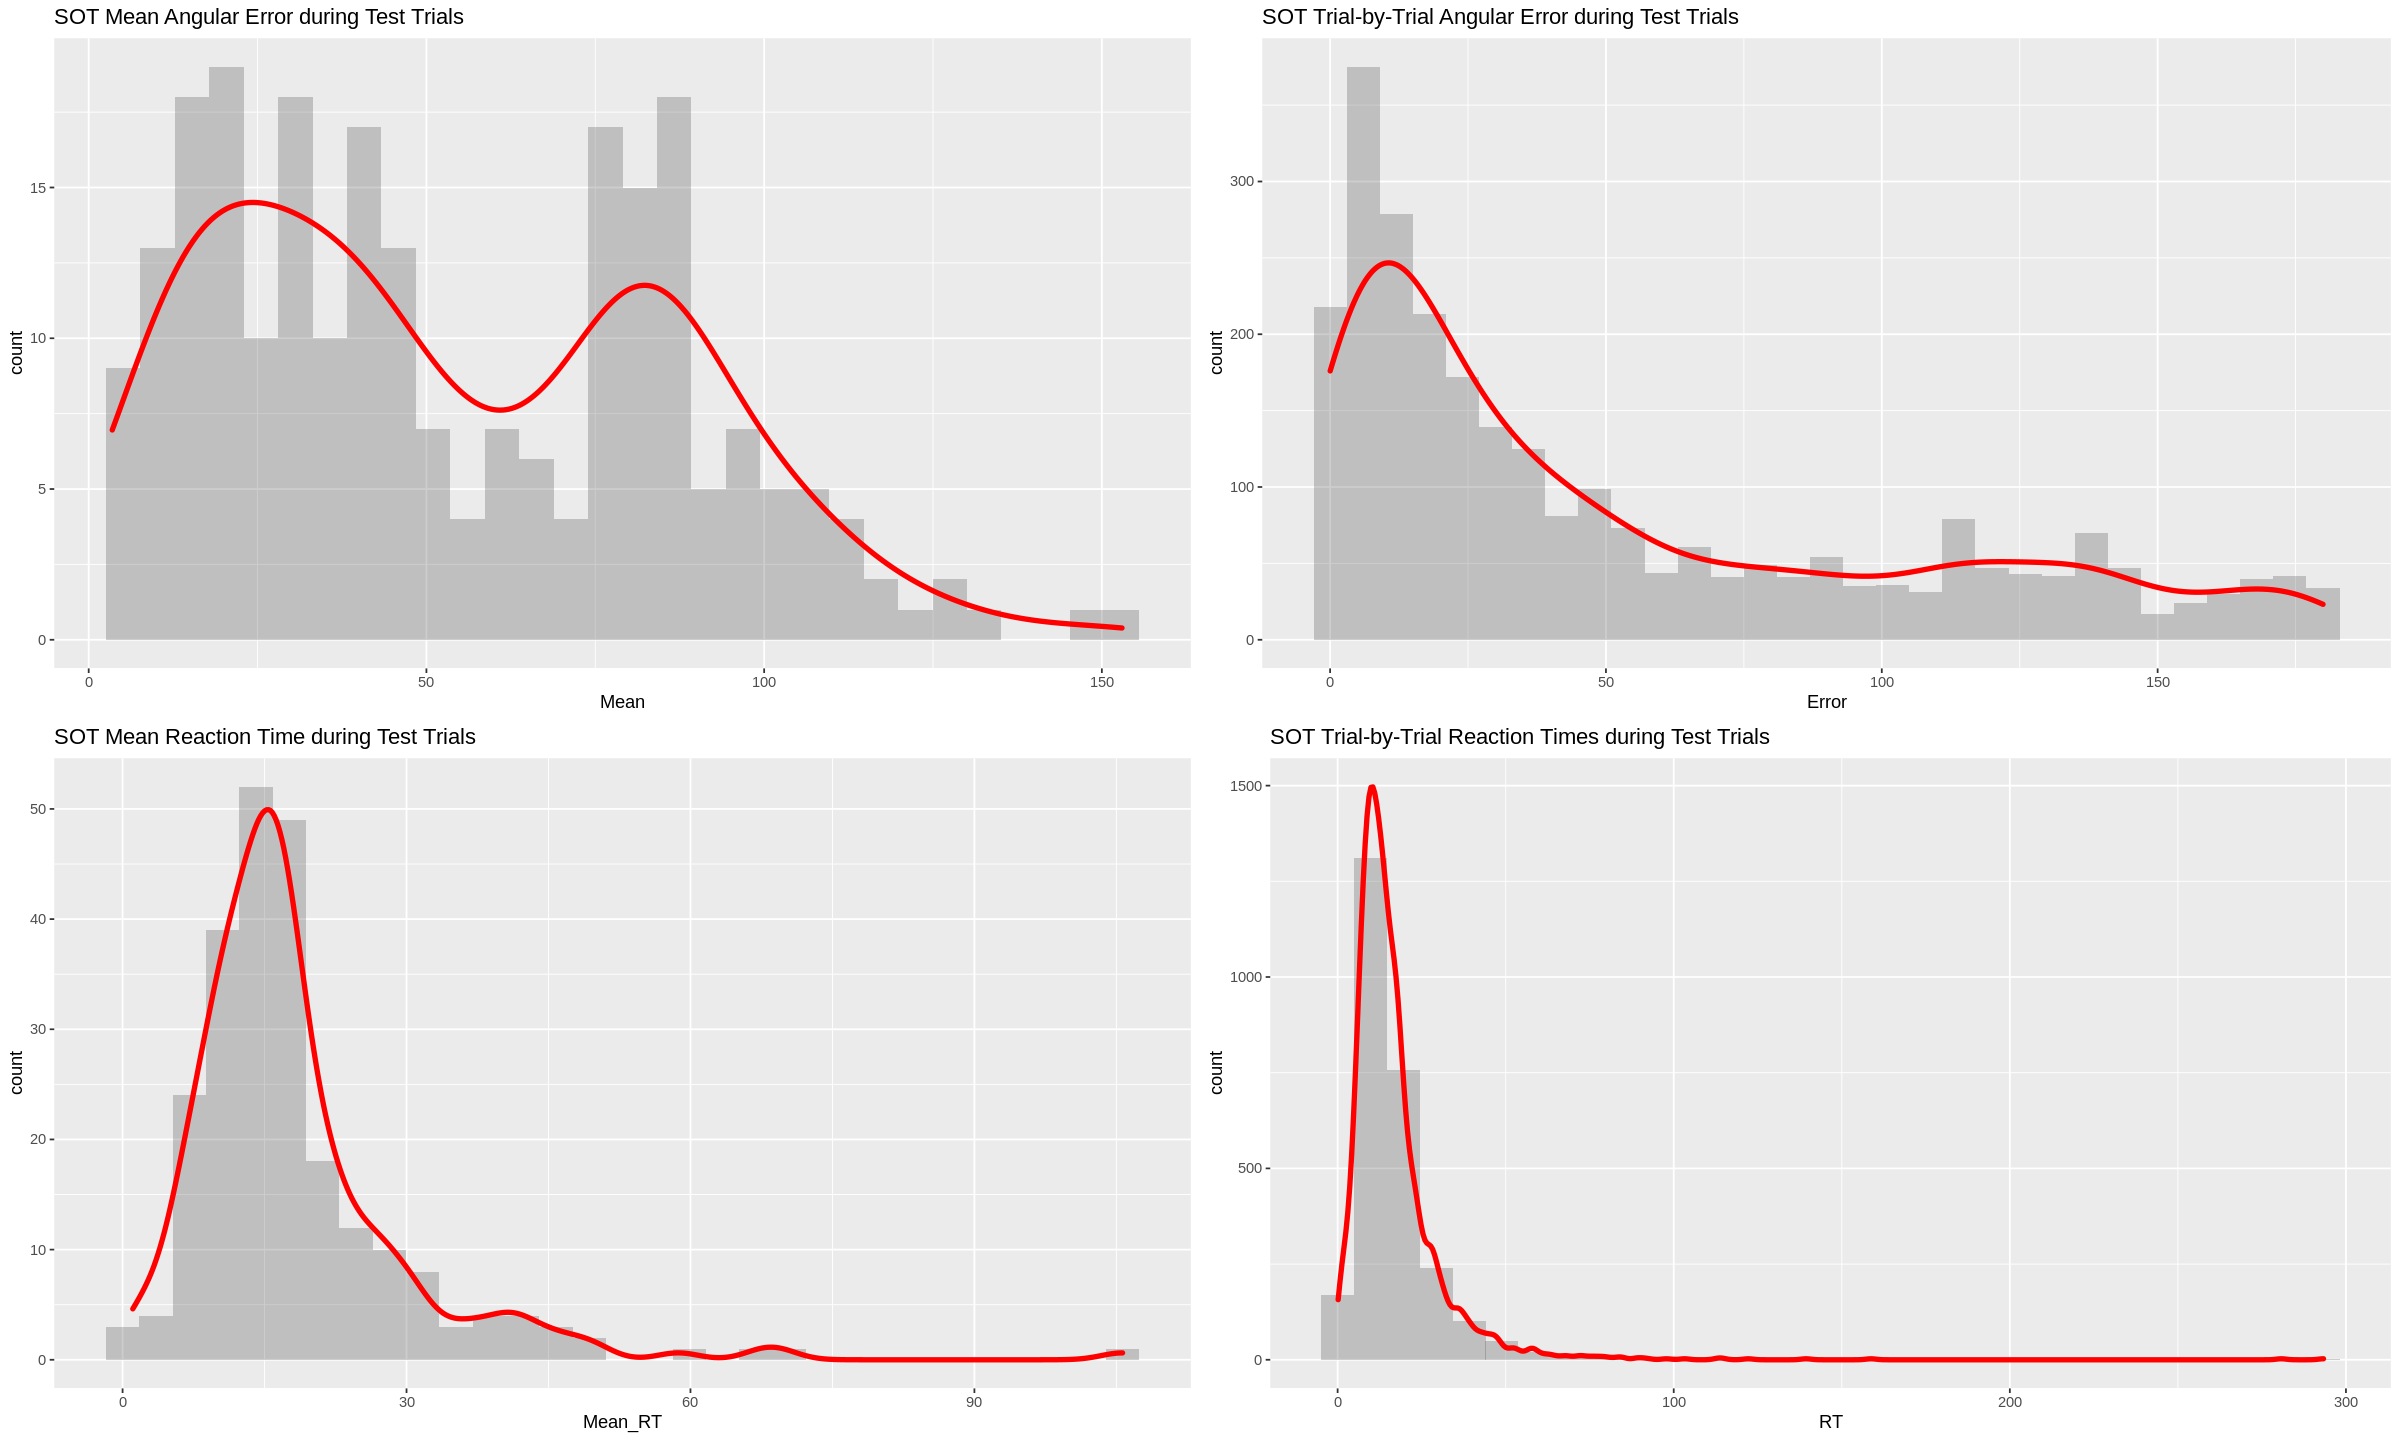

In [127]:
sot_mean_performances <- c()
sot_trial_performances <- c()
sot_trial_reactiontimes <- c()
sot_sd_performances <- c()
sot_mean_rt <- c()

options(warn=-1)

for (i in 1:length(sot_filenames)){
    
    file <- read.csv(paste0("/mnt/chrastil/lab/data/Hellman/GoogleDrive/SOT/", sot_filenames[i]))
    file <- file[grepl("Test", file$trialType), ]
    sot_mean_performances <- c(sot_mean_performances,  mean(file$angularError, na.rm = TRUE))
    sot_sd_performances <- c(sot_sd_performances, sd(file$angularError, na.rm = TRUE))
    sot_trial_performances <- c(sot_trial_performances, file$angularError)
    sot_trial_reactiontimes <- c(sot_trial_reactiontimes, file$reactionTime)
    sot_mean_rt <- c(sot_mean_rt, mean(file$reactionTime, na.rm = TRUE))
}


summary_SOT <- data.frame(Mean = sot_mean_performances, SD = sot_sd_performances, Mean_RT = sot_mean_rt)
summary_SOT_trial <- data.frame(Error = sot_trial_performances, RT = sot_trial_reactiontimes)

sotmean <- ggplot(summary_SOT, aes(x = Mean)) +
  geom_histogram(alpha = 0.3, binwidth = max(summary_SOT$Mean, na.rm = TRUE) / 30) +
  geom_density(aes(y = ..count.. * (max(summary_SOT$Mean, na.rm = TRUE) / 30)), size = 1.5, color = "red") +
  ggtitle("SOT Mean Angular Error during Test Trials")

sottbt <- ggplot(summary_SOT_trial, aes(x = Error)) +
  geom_histogram(alpha = 0.3, binwidth = max(summary_SOT_trial$Error) / 30) +
  geom_density(aes(y = ..count.. * (max(summary_SOT_trial$Error) / 30)), size = 1.5, color = "red") +
  ggtitle("SOT Trial-by-Trial Angular Error during Test Trials")

sottbtrt <- ggplot(summary_SOT_trial, aes(x = RT)) +
  geom_histogram(alpha = 0.3, binwidth = max(summary_SOT_trial$RT / 30, na.rm = TRUE)) +
  geom_density(aes(y = ..count.. * (max(summary_SOT_trial$RT, na.rm = TRUE) / 30)), size = 1.5, color = 'red') +
  ggtitle("SOT Trial-by-Trial Reaction Times during Test Trials")

sotmeanrt <- ggplot(summary_SOT, aes(x = Mean_RT)) +
  geom_histogram(alpha = 0.3, binwidth = max(summary_SOT$Mean_RT, na.rm = TRUE) / 30) +
  geom_density(aes(y = ..count.. * (max(summary_SOT$Mean_RT, na.rm = TRUE) / 30)), size = 1.5, color = "red") +
  ggtitle("SOT Mean Reaction Time during Test Trials")

options(repr.plot.width=20, repr.plot.height=12)

grid.arrange(sotmean, sottbt, sotmeanrt, sottbtrt, ncol = 2)
options(warn=1)